<a href="https://colab.research.google.com/github/rsurapol/Python-for-Numerical-Methods-for-Engineer/blob/master/Code_for_Numerical_Chpter05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
ตอนที่ 37 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีฟังก์ชันพหุนามของลากรองจ์
https://trinket.io/python/bccab55640

"""
from math import *
import operator, functools

def lagrange_interpolation(x, y, u):
  '''
  Parameters
  ----------
  x : list of floats
  y : list of floats
  u : float
  
  Returns
  -------  
  float
      an estimate at the point u
  '''
  r = range ( len(y) )
  a =       [ y[i]/product( x[i]-x[j] for j in r if j != i ) for i in r ]
  return sum( a[i]*product( [u   -x[j] for j in r if j != i] ) for i in r )

'''
#shorter way to write a product function
import operator, functools
def product(a): return functools.reduce(operator.mul, a, 1)

# original version
a =       [y[i]/product(x[i]-x[j] for j in range(len(y)) if j != i) for i in range(len(y))]
return sum(a[i]*product(u   -x[j] for j in range(len(y)) if j != i) for i in range(len(y)))
'''

def product(a): return functools.reduce(operator.mul, a, 1)
"""
def product(a): 
  p = 1
  for i in a: p *= i
  return p
"""

if __name__ == '__main__':

  x = [1.0000, 2.5000, 4.0000, 5.5000, 7.0000]
  y = [0.0000, 0.9700, 1.3900, 1.7000, 1.9500]
  u = 4.0

  estim = lagrange_interpolation(x, y, u)

  exact = log(u)
  print("\n\n")
  print("%.4f , %.4f" %(estim, exact))

# author by : Worasait Suwannik
# date   : Aug 2015
# rewrite by : Surapol Rochanapratishtha
# Date : May 2022

In [ ]:
"""
ตอนที่ 39 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีผลต่างย่อยของนิวตัน
https://trinket.io/python/b13a541c25
"""

from math import *
import operator, functools

def newton_interpolation(x, y, u):
  '''
  Parameters
  ----------
  x : list of floats
  y : list of floats
  u : float
  
  Returns
  -------  
  float
      an estimate at the point u
  '''
  g = y[:]
  s = g[0]
  for i in range(len(y)-1):
    g = [(g[j+1]-g[j])/(x[j+i+1]-x[j]) for j in range(len(g)-1)]
    s += g[0] * product(u-x[j] for j in range(i+1))
  return s  

'''
shorter way to write a product function

import operator, functools
def product(a): return functools.reduce(operator.mul, a, 1)
'''
def product(a): return functools.reduce(operator.mul, a, 1)
"""
def product(a): 
  p = 1
  for i in a: p *= i
  return p
"""

if __name__ == '__main__':
  
  x = [1.0000, 2.5000, 4.0000, 5.5000, 7.000]
  y = [log(i) for i in x]
  u = 6.0


  estim = newton_interpolation(x, y, u)
  exact = log(u)

  print("\n")
  print("%.11f , %.11f "%(estim, exact))

# author : Worasait Suwannik
# date   : Aug 2015
# rewrite by : Surapol Rochanapratishtha
# Date : May 2022



1.79640758190 , 1.79175946923 


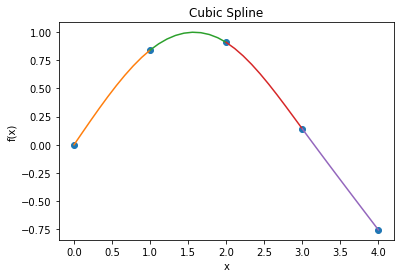

In [ ]:
"""
ตอนที่ 41 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีเส้นโค้งเรียบกำลังสาม
https://trinket.io/python/0793687aa3
"""
import math  
import matplotlib.pyplot as plt
import numpy as np

def cubic_spline(x, y):
  """
  Parameters
  ----------
  x  : list of floats
  y  : list of floats

  Returns
  -------  
  list of list of floats
  """
  n = len(x) - 1
  h = [x[i+1]-x[i] for i in range(n)]
  al = [3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]) for i in range(1,n)]
  al.insert(0,0)
  
  #Solve Tri-diagonal linear system by Crout Algorithm, to find c[i]
  #See R.L. Burden and J.D. Faires, Numerical Analysis, 7th ed. Book

  l = [1] * (n+1)
  u = [0] * (n+1)
  z = [0] * (n+1)

  for i in range(1, n):
    l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*u[i-1]
    u[i] = h[i]/l[i]
    z[i] = (al[i] - h[i-1]*z[i-1])/l[i]

  b = [0] * (n+1)
  c = [0] * (n+1)
  d = [0] * (n+1)

  for i in range(n-1, -1, -1):    #for i in reversed(range(n)):
    c[i] = z[i] - u[i]*c[i+1]
    b[i] = (y[i+1]-y[i])/h[i] - h[i]*(c[i+1] + 2*c[i])/3
    d[i] = (c[i+1]-c[i])/(3*h[i])
  return [y, b, c, d]

#-------------------------------------------------------------
if __name__ == '__main__':

  # the function to be interpolated
  def f(x):
    return math.sin(x)
    #return math.e ** x

  # input
  interval = 4
  xp = [i for i in range(interval + 1)]
  yp = [f(i) for i in range(interval + 1)]



  """
  for i in range(interval + 1):
    print("%d, %.12f "%(xp[i],yp[i]))
  """
  # process
  #a = cubic_spline(xp, yp)
  #print(a) 
  

  # prepare data for plotting the splines
  points_per_interval = 10
  xs = []
  ys = []
  for i in range(interval):
    xs.append(np.linspace(i, i+1, points_per_interval))
    ys.append([a[0][i] + 
               a[1][i]*(xs[i][k]-i) + 
               a[2][i]*(xs[i][k]-i)**2 + 
               a[3][i]*(xs[i][k]-i)**3   
               for k in range(points_per_interval)])
  
  # prepare data for plotting the given function
  x = np.linspace(0, 4.5, interval * points_per_interval - (interval - 1))
  y = [f(x[i]) for i in range(len(x))]
  
  #plt.plot(x,y)
  plt.plot(xp,yp,"o")
  
  plt.plot(xs[0],ys[0]) #plot cubic spline in [0,1] 
  plt.plot(xs[1],ys[1]) #plot cubic spline in [1,2]   
  plt.plot(xs[2],ys[2]) #plot cubic spline in [2,3]  
  plt.plot(xs[3],ys[3]) #plot cubic spline in [3,4]

  plt.title('Cubic Spline')
  plt.xlabel('x')
  #plt.ylabel('e^x')
  plt.ylabel('f(x)')
  plt.show()

# cubic spline interpolation
# author : worasait suwannik
# date   : apr 2015
# rewrite by : Surapol Rochanapratishtha
# Date : May 2022

In [ ]:
"""
ตอนที่ 43 โปรแกรมคอมพิวเตอร์สำหรับระเบียบวิธีกำลังสองน้อยสุด

"""

"""
matrix.py
"""
def column(m, c):
  return [m[i][c] for i in range(len(m))]

def row(m, r):
  return m[r][:]
   
def height(m):
  return len(m)
  
def width(m):
  return len(m[0])

def print_matrix(m):
  for i in range(len(m)):
      print(m[i])  
"""
gauss.py
"""
from matrix import *

def gaussian_elimination(m):
  # forward elimination
  n = height(m)
  for i in range(n):
    for j in range(i+1, n):
      m[j] = [m[j][k] - m[i][k]*m[j][i]/m[i][i] for k in range(n+1)]
   
  if m[n-1][n-1] == 0: raise ValueError('No unique solution')
  
  # backward substitution
  x = [0] * n
  for i in range(n-1, -1, -1):  # for i in reversed(range(n)):
    s = sum(m[i][j]*x[j] for j in range(i, n))
    x[i] = (m[i][n] - s) / m[i][i]
  return x

#from gauss import *

def least_square(x, y, order, sys_lin_method=gaussian_elimination):
  """
  Parameters
  ----------
  x : list of floats
  y : list of floats
  order : int
  
  Returns
  -------  
  list of floats
      coefficients of a polynomial
  """  
  sx  = [sum(x[j]**i        for j in range(len(x))) for i in range(order*2+1)]
  sxy = [sum(x[j]**i * y[j] for j in range(len(x))) for i in range(order+1)]
  m = []
  for i in range(order+1):
    a = sx[i:(i+order+1)]
    a.append(sxy[i])
    m.append(a)
  return sys_lin_method(m)

if __name__ == '__main__':
  x = [0, 0.5, 1, 1.5, 2, 2.5]  # data from http://web.iitd.ac.in/~pmvs/courses/mel705/curvefitting.pdf
  y = [0.0674, -0.9156, 1.6253, 3.0377, 3.3535, 7.9409]
  print(least_square(x, y, 2))
  
  #x = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
  #y = [2.8, 4.1, 5.2, 5.9, 6.8, 8, 9.3, 10, 10.6, 12, 13.4, 14, 15.5]
  #print(least_square(x, y, 1))

# least square interpolation
# author : Worasait Suwannik
# date   : Aug 2015
